# COMP3314 HW1-Q3: Decision Boundary (20 points)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [2]:
"""
Note: Do not change the code in this cell.
"""


class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=10):
        """
        Args:
            eta (float, optional): Learning rate. Defaults to 0.01.
            n_iter (int, optional): Number of iterations. Defaults to 10.
        """
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, xs, ys):
        """
        Fit training data.

        Args:
            xs (array-like): Training vectors, shape = (n_samples, n_features).
            ys (array-like): Target values, shape = (n_samples,).

        Note: For simplicity, batch size is 1.
        """
        self.w_ = np.zeros(1 + xs.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for x, y in zip(xs, ys):
                update = self.eta * (y - self.predict(x))
                self.w_[1:] += update * x
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def predict(self, xs):
        """
        Args:
            xs (array-like): Training vectors, shape = (n_samples, n_features).

        Returns:
            array-like: Predicted labels, shape = (n_samples,).
        """
        y_pred = np.dot(xs, self.w_[1:]) + self.w_[0]
        y_pred = np.where(y_pred >= 0.0, 1, -1)
        return y_pred

In [3]:
"""
Note: Do not change the code in this cell.
"""


def fetch_dataset():
    """
    Download and get a subset the UCI Iris dataset.

    Returns:
        (xs, ys), where xs has shape (100, 2) and ys has shape (100,).
    """
    # Download dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    df = pd.read_csv(url, header=None)
    df.tail()

    # Select setosa and versicolor
    num_samples = 100
    ys = df.iloc[0:num_samples, 4].values
    ys = np.where(ys == "Iris-setosa", -1, 1)

    # Extract sepal length and petal length
    xs = df.iloc[0:num_samples, [0, 2]].values

    return xs, ys


def plot_dataset(xs, ys):
    # Sanity check: ys must be 1 or -1
    assert np.all(np.logical_or(ys == 1, ys == -1))

    # Set plotting styles
    _map_label_to_color = {
        -1: "red",
        1: "blue",
    }
    _map_label_to_marker = {
        -1: "s",
        1: "o",
    }

    # Plot dataset.
    for label in [1, -1]:
        plt.scatter(x=xs[ys == label, 0],
                    y=xs[ys == label, 1],
                    alpha=0.8,
                    c=_map_label_to_color[label],
                    marker=_map_label_to_marker[label])


def plot_decision_regions(xs, model, resolution=0.05):
    # Compute limits (bounds) for plotting, add 1 to each side for padding.
    # Row and column corresponds to the first/second feature dimension of xs.
    row_limit = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    col_limit = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    # Create a uniform grid of points based on the interval and resolution.
    row_min, row_max = row_limit
    col_min, col_max = col_limit
    rows_grid, cols_grid = np.meshgrid(np.arange(row_min, row_max, resolution),
                                       np.arange(col_min, col_max, resolution))

    # This xs is the simulated grid, no the original dataset.
    xs = np.array([rows_grid.ravel(), cols_grid.ravel()]).T

    # Predict labels for each point in the grid.
    ys_pred = model.predict(xs)
    ys_pred = ys_pred.reshape(rows_grid.shape)

    # Plot decision regions.
    cmap = ListedColormap(["red", "blue"])
    plt.contourf(rows_grid, cols_grid, ys_pred, alpha=0.3, cmap=cmap)
    plt.xlim(rows_grid.min(), rows_grid.max())
    plt.ylim(cols_grid.min(), cols_grid.max())


def plot_decision_boundary(src_pt, dst_pt):
    """
    Plot a line from src_pt to dst_pt. src_pt and dst_pt are 2D point
    coordinates representing the decision boundary.

    Args:
        src_pt (array-like): Source point, shape = (2,).
        dst_pt (array-like): Destination point, shape = (2,).
    """
    assert len(src_pt) == 2
    assert len(dst_pt) == 2
    plt.plot(
        [src_pt[0], dst_pt[0]],
        [src_pt[1], dst_pt[1]],
        color="green",
        linewidth=4,
        label="Decision boundary (should match the decision regions)",
    )

## 1. Train model
First, let's load the dataset and train the perceptron model.

In [4]:
# Download dataset.
xs, ys = fetch_dataset()

# Train model.
model = Perceptron(eta=0.1, n_iter=10)
model = model.fit(xs, ys)

## 2. Visualize dataset and decision regions
Now, let's visulize the decision regions. This is achieve by generating a grid of points and running them through the classifier. You may checkout the `plot_decision_regions()` function for more details.

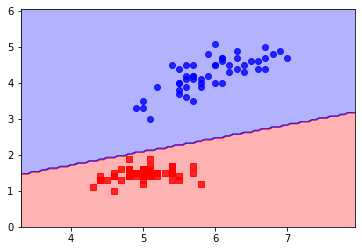

In [5]:
plot_dataset(xs, ys)
plot_decision_regions(xs, model)

## 3. Draw a decision boundary

The decision boundary is a line specified by two points: src_pt and dst_pt. As a first step, we give it some random values and call the `plot_decision_boundary()` function for plotting.

We can see that the deicison boundary does not match the decision regions.

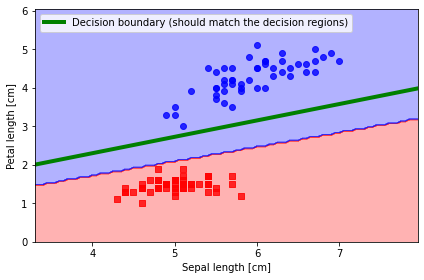

In [6]:
src_pt = [3.3, 2.0]
dst_pt = [8.0, 4.0]
plot_dataset(xs, ys)
plot_decision_regions(xs, model)
plot_decision_boundary(src_pt, dst_pt)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## 4. Compute actual decision boundary

Now, it's your turn to compute the actual decision boundary based on the model. Complete the `compute_decision_boundary()` function below with your own code. You should not hard-code dataset specific values inside the function.

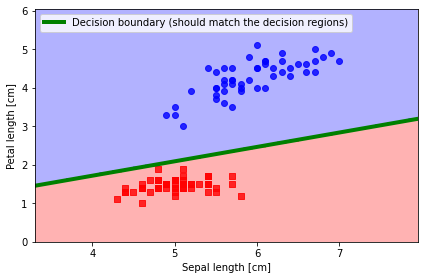

In [15]:
def compute_decision_boundary(xs, model):
    """
    Compute the decision boundary from the model.

    Returns:
        A tuple of two points (src_pt, dst_pt).
    """
    # Your code here ####################
    # Consider w1*x1 + w2*x2 + w0 = 0
    # x1 = -w0/w1 when x2 = 0
    # x2 = -w0/w2 when x1 = 0
    x_axis = (-model.w_[0]/model.w_[1],0)
    y_axis = (0,-model.w_[0]/model.w_[2])
    # Here the linear model y = m*x + c is adopted, m is the slope
    slope = (y_axis[1]-x_axis[1])/(y_axis[0]-x_axis[0])
    # c = y_0 - m*x_0
    c = y_axis[1]-slope*y_axis[0]
    # Consider the boundary for x in [0,8]
    src_pt = (0,slope*0+c)
    dst_pt = (8,slope*8+c)
    #####################################
    return src_pt, dst_pt


plot_dataset(xs, ys)
plot_decision_regions(xs, model)
src_pt, dst_pt = compute_decision_boundary(xs, model)
plot_decision_boundary(src_pt, dst_pt)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()